# Лабораторная работа: обучение многообразий

# Потёмин Владислав

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение**

Обозначения:

- данные центрированы: $ \sum_{i=1}^n x_i = 0 $;
- $ X \in \mathbb{R}^{n \times p}$ — матрица объектов (строки — объекты, столбцы — признаки);
- $ W = [w_1, w_2] \in \mathbb{R}^{p \times 2}$ — матрица двух главных направлений;
- $ z_i = \begin{pmatrix} z_{i1} \\ z_{i2} \end{pmatrix} \in \mathbb{R}^2$ — новые координаты объекта $x_i$;
- матрица всех новых координат $Z \in \mathbb{R}^{n \times 2}$ (строка — это $z_i^T$).

Тогда приближение:
$$
x_i \approx W z_i = w_1 z_{i1} + w_2 z_{i2}.
$$

### 1. Минимизируемый функционал

Хотим, чтобы приближение было как можно лучше в смысле суммы квадратов ошибок.

Функционал:
$$
L(W, Z) = \sum_{i=1}^n \lVert x_i - W z_i \rVert^2
= \lVert X - Z W^T \rVert_F^2,
$$
где $\lVert\cdot\rVert_F$ — фробениусова норма.

Накладываем ограничения:

- столбцы $w_1, w_2$ имеют единичную норму:
  $$
  \lVert w_1 \rVert^2 = 1, \quad \lVert w_2 \rVert^2 = 1;
  $$
- и ортогональны:
  $$
  w_1^T w_2 = 0.
  $$

То есть $W^T W = I_2$.

Задача:
$$
\min_{W,Z} L(W,Z) \quad \text{при} \quad W^T W = I_2.
$$

### 2. Новые координаты — это проекции на $(w_1, w_2)$

Сначала фиксируем $W$ и минимизируем $L(W,Z)$ по всем $z_i$.

Для одного объекта:
$$
\ell_i(z_i) = \lVert x_i - W z_i \rVert^2.
$$

Раскроем:
$$
\ell_i(z_i)
= (x_i - W z_i)^T (x_i - W z_i)
= x_i^T x_i - 2 z_i^T W^T x_i + z_i^T W^T W z_i.
$$

Берём градиент по $z_i$ и приравниваем к нулю:
$$
\frac{\partial \ell_i}{\partial z_i}
= -2 W^T x_i + 2 W^T W z_i = 0.
$$

Так как $W^T W = I_2$, получаем:
$$
z_i = W^T x_i.
$$

Компоненты:
$$
z_{i1} = w_1^T x_i, \qquad
z_{i2} = w_2^T x_i.
$$

То есть каждая новая координата — это **скалярное произведение** (проекция) исходного вектора $x_i$ на соответствующий вектор $w_k$.

Геометрически: мы проектируем точки на двумерное подпространство, натянутое на $w_1$ и $w_2$.

### 3. Почему $(w_1, w_2)$ — собственные векторы ковариационной матрицы

Подставим $z_i = W^T x_i$ обратно в функционал.

Сумма квадратов «потерь»:
$$
L(W) = \sum_{i=1}^n \lVert x_i - W W^T x_i \rVert^2.
$$

Матрица $P = W W^T$ — ортогональный проектор на подпространство $\mathrm{span}\{w_1, w_2\}$.
Тогда
$$
x_i = P x_i + (I - P) x_i,
$$
и мы минимизируем сумму квадратов остатка $(I - P)x_i$.

Эквивалентно: **минимизировать** энергию вне подпространства —
то же самое, что **максимизировать** энергию в подпространстве:
$$
\sum_{i=1}^n \lVert P x_i \rVert^2
= \sum_{i=1}^n \lVert W^T x_i \rVert^2
= \sum_{i=1}^n z_i^T z_i.
$$

Поскольку данные центрированы, выборочная ковариационная матрица:
$$
\Sigma = \frac{1}{n} X^T X.
$$

Посмотрим на среднюю квадратичную «энергию» проекций:
$$
\frac{1}{n} \sum_{i=1}^n \lVert W^T x_i \rVert^2
= \frac{1}{n} \sum_{i=1}^n x_i^T W W^T x_i
= \operatorname{tr}\!\left(
W^T \left(\frac{1}{n} \sum_{i=1}^n x_i x_i^T\right) W
\right)
= \operatorname{tr}(W^T \Sigma W).
$$

Итак, задача эквивалентна:
$$
\max_{W^T W = I_2} \operatorname{tr}(W^T \Sigma W).
$$

Пусть спектральное разложение ковариационной матрицы:
$$
\Sigma = V \Lambda V^T,
$$
где $V = [v_1, \ldots, v_p]$ — ортонормированные собственные векторы,
$\Lambda = \mathrm{diag}(\lambda_1, \ldots, \lambda_p)$, $\lambda_1 \ge \lambda_2 \ge \ldots \ge \lambda_p \ge 0$.

Любая матрица $W$ с ортонормированными столбцами может быть записана как
$$
W = V A,
$$
где $A \in \mathbb{R}^{p \times 2}$, $A^T A = I_2$.

Тогда
$$
\operatorname{tr}(W^T \Sigma W)
= \operatorname{tr}(A^T \Lambda A).
$$

Обозначим столбцы $A$ через $a^{(1)}$ и $a^{(2)}$. Тогда
$$
\operatorname{tr}(A^T \Lambda A)
= \sum_{k=1}^2 (a^{(k)})^T \Lambda a^{(k)}
= \sum_{k=1}^2 \sum_{j=1}^p \lambda_j (a^{(k)}_j)^2.
$$

Так как $A^T A = I_2$, сумма квадратов коэффициентов ограничена, и максимум достигается, когда вся «масса» приходится на самые большие собственные значения $\lambda_1, \lambda_2$.

Значит,
$$
W^\star = [v_1, v_2],
$$
где $v_1, v_2$ — собственные векторы $\Sigma$, соответствующие наибольшим собственным значениям $\lambda_1, \lambda_2$.

Следовательно, $w_1, w_2$ — это собственные векторы ковариационной матрицы $\Sigma$.

### 4. Статистический смысл собственных значений

Новая координата по $k$-й главной компоненте:
$$
z_{ik} = w_k^T x_i.
$$

Так как данные центрированы, выборочное математическое ожидание:
$$
\frac{1}{n} \sum_{i=1}^n z_{ik}
= w_k^T \left(\frac{1}{n} \sum_{i=1}^n x_i\right) = 0.
$$

Выборочная дисперсия этой координаты:
$$
\mathrm{Var}(z_{\cdot k})
= \frac{1}{n} \sum_{i=1}^n z_{ik}^2
= \frac{1}{n} \sum_{i=1}^n (w_k^T x_i)^2
= w_k^T \left(\frac{1}{n} \sum_{i=1}^n x_i x_i^T\right) w_k
= w_k^T \Sigma w_k.
$$

Если $w_k$ — собственный вектор $\Sigma$ с собственным значением $\lambda_k$, то
$$
\Sigma w_k = \lambda_k w_k.
$$

Тогда
$$
\mathrm{Var}(z_{\cdot k})
= w_k^T \Sigma w_k
= w_k^T (\lambda_k w_k)
= \lambda_k (w_k^T w_k)
= \lambda_k,
$$
так как $\lVert w_k \rVert^2 = 1$.

**Вывод.** Собственное значение $\lambda_k$ ковариационной матрицы $\Sigma$ равно дисперсии новой координаты по $k$-й главной компоненте.

То есть:

- первые главные компоненты — направления **максимальной дисперсии** данных;
- их собственные значения показывают, **сколько дисперсии** (вариации) захватывает каждая компонента.


## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение**

Пусть $X \in \mathbb{R}^{n \times p}$, рассмотрим симметричную матрицу
$$
XX^T \in \mathbb{R}^{n \times n}.
$$

### 1. Существование ортогональной матрицы $U$ и диагональной $\Lambda$

Матрица $XX^T$ симметрична:
$$
(XX^T)^T = XX^T.
$$

Для любой вещественной симметричной матрицы по теореме спектрального разложения существует ортогональная матрица $U$ и диагональная матрица $\Lambda$ такие, что
$$
XX^T = U \Lambda U^T,
$$
или эквивалентно
$$
U^T XX^T U = \Lambda,
$$
где $\Lambda = \mathrm{diag}(\lambda_1,\dots,\lambda_n)$ — диагональная матрица собственных значений.

### 2. Равенство $XX^T U = U \Lambda$ и связь с $X^T X$

Из равенства $XX^T = U \Lambda U^T$ домножим слева на $U^T$ и справа на $U$:
$$
U^T XX^T U = \Lambda.
$$

Это означает, что столбцы матрицы $U$ являются собственными векторами $XX^T$:
$$
XX^T U = U \Lambda.
$$

Теперь домножим это равенство слева на $X^T$:
$$
X^T (XX^T U) = X^T (U \Lambda),
$$
получаем
$$
(X^T X)(X^T U) = X^T U \,\Lambda.
$$

То есть столбцы матрицы $X^T U$ являются собственными векторами для $X^T X$ с теми же собственными значениями $\lambda_i$.

### 3. Ортогональность столбцов матрицы $X^T U$

Рассмотрим матрицу
$$
B = X^T U \in \mathbb{R}^{p \times n}.
$$
Её столбцы — $b_1,\dots,b_n$.

Посчитаем матрицу скалярных произведений:
$$
B^T B = (X^T U)^T (X^T U)
= U^T X X^T U.
$$

Но $XX^T = U \Lambda U^T$, значит
$$
B^T B = U^T (U \Lambda U^T) U = \Lambda.
$$

Матрица $\Lambda$ диагональная, поэтому:
- внедиагональные элементы равны нулю ⇒ разные столбцы $b_i$ попарно ортогональны;
- диагональные элементы равны $\lambda_i$ ⇒
  $$
  \lVert b_i \rVert^2 = \lambda_i.
  $$

Значит, столбцы $X^T U$ **ортогональны**, но **не нормированы** (у них нормы $\sqrt{\lambda_i}$, а не 1).

### 4. Нахождение норм и переход к ортонормированным векторам (аналог PCA)

Из пункта 3:
$$
\lVert b_i \rVert = \sqrt{\lambda_i}.
$$

Построим новые столбцы
$$
v_i = \frac{1}{\sqrt{\lambda_i}}\, b_i
= \frac{1}{\sqrt{\lambda_i}}\, X^T u_i,
$$
где $u_i$ — $i$-й столбец $U$.

Соберём их в матрицу
$$
V = [v_1, \dots, v_k] = X^T U \Lambda^{-1/2},
$$
где $\Lambda^{-1/2} = \mathrm{diag}(1/\sqrt{\lambda_1}, \dots, 1/\sqrt{\lambda_k})$.

Проверим ортонормированность:
$$
V^T V
= \Lambda^{-1/2} U^T X X^T U \Lambda^{-1/2}
= \Lambda^{-1/2} \Lambda \Lambda^{-1/2}
= I.
$$

Значит, столбцы $V$ имеют единичные нормы и попарно ортогональны — это уже **ортонормированный базис**, аналог базиса главных компонент.

Таким образом, из собственных векторов матрицы $XX^T$ мы получили ортонормированные собственные векторы для $X^T X$, как в стандартном PCA.

### 5. Численная проверка


In [2]:
import numpy as np

np.random.seed(42)

n, p = 3, 5
X = np.random.randn(n, p)

print("X shape:", X.shape)

XXT = X @ X.T
XTX = X.T @ X

print("XX^T:\n", XXT)
print("X^T X:\n", XTX)

eigvals, U = np.linalg.eigh(XXT)

idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
U = U[:, idx]

Lambda = np.diag(eigvals)

print("\nСобственные значения XX^T (λ):\n", eigvals)
print("Проверка ортогональности U^T U:\n", U.T @ U)

left = XXT @ U
right = U @ Lambda
print("\nXX^T U:\n", left)
print("U Λ:\n", right)
print("Макс. отклонение XX^T U - U Λ:", np.max(np.abs(left - right)))

B = X.T @ U
print("\nB = X^T U, shape:", B.shape)

left2 = XTX @ B
right2 = B @ Lambda
print("\nX^T X * B:\n", left2)
print("B * Λ:\n", right2)
print("Макс. отклонение X^T X B - B Λ:", np.max(np.abs(left2 - right2)))

BTB = B.T @ B
print("\nB^T B (должно быть ≈ Λ):\n", BTB)

col_norms = np.linalg.norm(B, axis=0)
print("Нормы столбцов B (должны быть ≈ sqrt(λ)):\n", col_norms)
print("sqrt(λ):\n", np.sqrt(eigvals))

Lambda_inv_sqrt = np.diag(1.0 / np.sqrt(eigvals + 1e-12))
V = B @ Lambda_inv_sqrt

VTV = V.T @ V
print("\nV^T V (должно быть ≈ I):\n", VTV)


X shape: (3, 5)
XX^T:
 [[ 3.05979016 -0.67965499 -2.51916374]
 [-0.67965499  3.65246689 -0.47892836]
 [-2.51916374 -0.47892836  7.12618873]]
X^T X:
 [[ 0.51630102 -0.22260251  0.02990163  1.75307971  0.55601679]
 [-0.22260251  2.72993434  1.00970153 -0.06090909  1.69253838]
 [ 0.02990163  1.00970153  1.06700225  0.1632164  -0.15264407]
 [ 1.75307971 -0.06090909  0.1632164   6.20066744  2.68891059]
 [ 0.55601679  1.69253838 -0.15264407  2.68891059  3.32454073]]

Собственные значения XX^T (λ):
 [8.334506   3.96640549 1.53753428]
Проверка ортогональности U^T U:
 [[ 1.00000000e+00 -2.39672329e-16 -7.91000207e-17]
 [-2.39672329e-16  1.00000000e+00 -1.51693886e-18]
 [-7.91000207e-17 -1.51693886e-18  1.00000000e+00]]

XX^T U:
 [[-3.56366108 -1.34576329  1.28828317]
 [-0.25293521  3.69572328  0.55630109]
 [ 7.5299624  -0.51276029  0.62838464]]
U Λ:
 [[-3.56366108 -1.34576329  1.28828317]
 [-0.25293521  3.69572328  0.55630109]
 [ 7.5299624  -0.51276029  0.62838464]]
Макс. отклонение XX^T U - U 

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

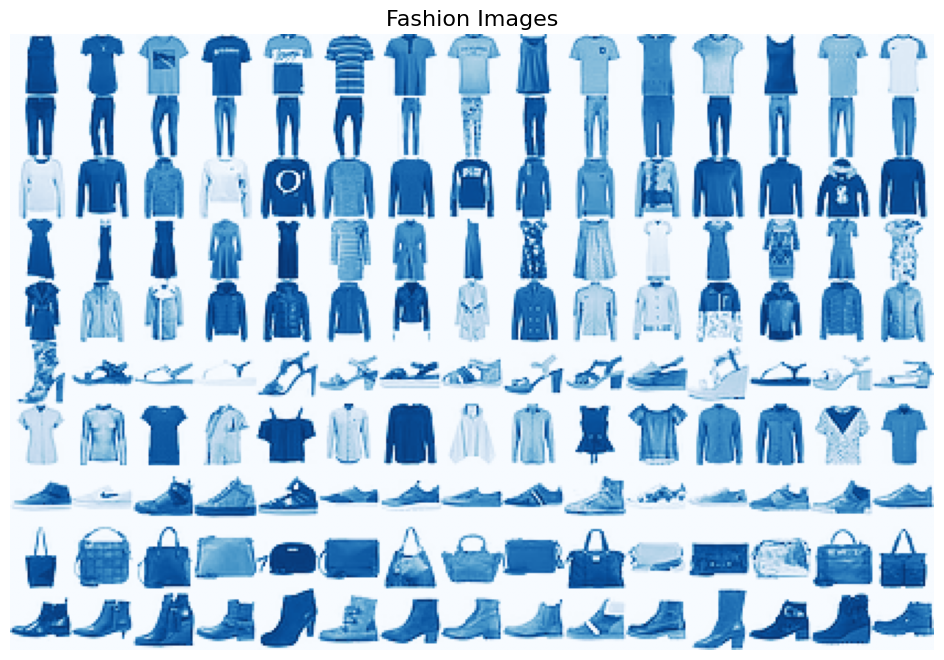

In [4]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [5]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape


((8000, 784), (2000, 784))

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_reg = LogisticRegression(
    max_iter=2000,
    tol=0.001,
    multi_class='multinomial',
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

y_pred_clean = log_reg.predict(X_test)
f1_clean = f1_score(y_test, y_pred_clean, average='weighted')

print(f"F1-score на чистых тестовых данных (weighted): {f1_clean:.4f}")


C:\Users\print\OneDrive\Рабочий стол\Yadro - Статистика и машинное обучени\LW\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


F1-score на чистых тестовых данных (weighted): 0.7439


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

`f1_score` — это метрика качества классификации, которая объединяет **точность (precision)** и **полноту (recall)** в одно число:

- precision = доля верных «положительных» предсказаний среди всех предсказанных положительных;
- recall = доля верно найденных положительных объектов среди всех реально положительных.

F1 определяется как гармоническое среднее:
$$
F1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}.
$$

**Смысл:** F1 высокое только тогда, когда высоки **и** precision, и recall. Если одна из метрик сильно просаживается, F1 тоже падает.

**Плюсы:**

- учитывает оба типа ошибок (ложные срабатывания и пропуски);
- удобна, когда данные несбалансированы и простая accuracy может быть обманчивой.

**Минусы:**

- не различает, что для нас важнее — precision или recall (оба учитываются симметрично);
- усреднение в многоклассовом случае может скрывать проблемы по отдельным классам.

Параметр `average='weighted'` в многоклассовой задаче означает:

- считаем F1 **по каждому классу отдельно**;
- затем берём среднее, взвешенное по количеству объектов в каждом классе
  (часто встречающиеся классы влияют на итог сильнее редких).

Другие варианты `average`:

- `'macro'` — простое среднее F1 по классам, **все классы равны по важности**;
- `'micro'` — считаем общие TP/FP/FN по всем классам и считаем один F1,
  хорошо подходит при сильном дисбалансе;
- `None` — возвращает массив F1 по каждому классу;
- `'samples'` — используется в задачах multi-label (несколько меток на объект).

В этой работе `'weighted'` удобно, потому что учитывает и F1 по каждому классу, и реальное распределение классов в данных.


Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

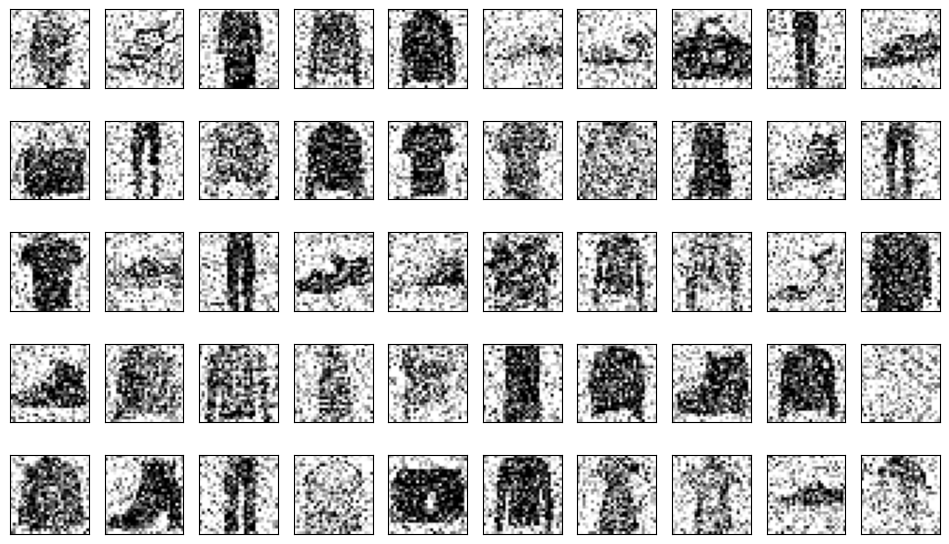

In [8]:
noise_scale = 100

rng = np.random.default_rng(42)
X_test_noisy = rng.normal(loc=X_test, scale=noise_scale)

X_test_noisy = np.clip(X_test_noisy, 0, 255)

X_test_noisy.shape

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

После добавления шума пиксели стали «зернистыми», контуры объектов размылись.
Классы всё ещё в целом угадываются, но границы между ними стали менее отчётливыми:
у некоторых изображений одежда почти сливается с фоном.

Чем больше параметр `scale`, тем сильнее размываются детали и тем сложнее человеку
(и модели) распознать класс по картинке.


Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [9]:
y_pred_noisy = log_reg.predict(X_test_noisy)
f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')

print(f"F1-score на зашумлённых тестовых данных (scale={noise_scale}): {f1_noisy:.4f}")
print(f"Падение качества относительно чистых данных: {f1_clean - f1_noisy:.4f}")


F1-score на зашумлённых тестовых данных (scale=100): 0.3227
Падение качества относительно чистых данных: 0.4212


**Ваши выводы:**

После добавления шума с параметром `scale = 100` качество модели сильно ухудшилось:
F1-score упал с ≈0.74 на чистых данных до ≈0.32 на зашумлённых.

Это значит, что логистическая регрессия становится гораздо чаще ошибаться —
часть объектов начинает относиться не к своим классам, потому что из-за шума
модель «не видит» характерные признаки одежды.

Таким образом, добавленный шум заметно портит информативность признаков
и напрямую снижает качество классификации.


Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

Форма после снижения размерности: (2000, 482)
Количество компонент, выбранных PCA: 482


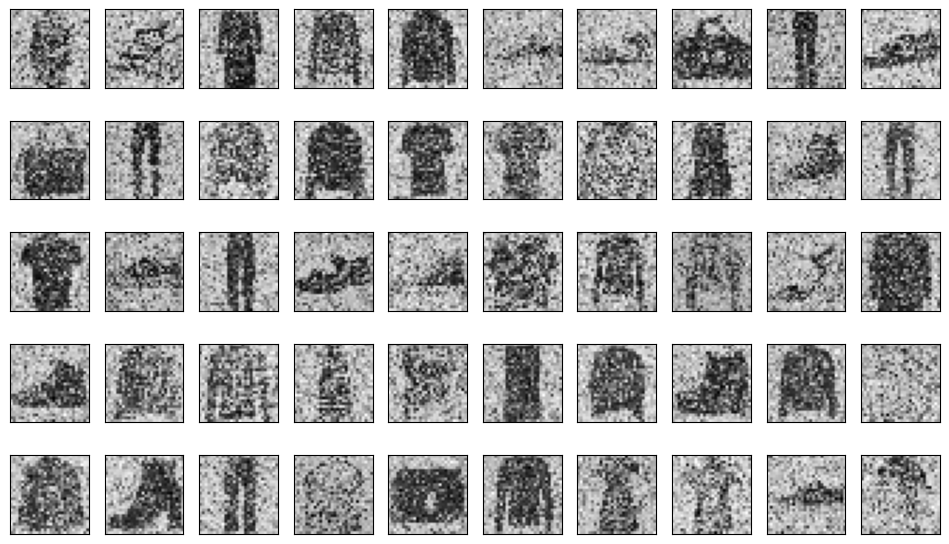

In [10]:
from sklearn.decomposition import PCA

explained_variance = 0.9

pca = PCA(
    n_components=explained_variance,
    svd_solver='full',
    random_state=42
)

pca.fit(X_test_noisy)

X_test_noisy_reduced = pca.transform(X_test_noisy)
restored_X_test_noisy = pca.inverse_transform(X_test_noisy_reduced)

print("Форма после снижения размерности:", X_test_noisy_reduced.shape)
print("Количество компонент, выбранных PCA:", pca.n_components_)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

После применения PCA с восстановлением через `inverse_transform` изображения стали более гладкими:
мелкий шум частично исчез, контуры предметов одежды стали снова лучше различимы.

При этом детали немного «размылись»: PCA убирает не только шум, но и часть информации.
При достаточно большой доле объяснённой дисперсии (например, 0.8–0.9) визуально сохраняется
основная структура объекта, но уровень шума заметно ниже, чем у исходных зашумлённых картинок.


Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [11]:
y_pred_restored = log_reg.predict(restored_X_test_noisy)
f1_restored = f1_score(y_test, y_pred_restored, average='weighted')

print(f"F1-score на данных после очистки PCA "
      f"(scale={noise_scale}, explained_variance={explained_variance}): {f1_restored:.4f}")
print(f"Сравнение: чистые={f1_clean:.4f}, зашумлённые={f1_noisy:.4f}, после PCA={f1_restored:.4f}")


F1-score на данных после очистки PCA (scale=100, explained_variance=0.9): 0.3384
Сравнение: чистые=0.7439, зашумлённые=0.3227, после PCA=0.3384


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

**Ваши выводы:**

1. При увеличении уровня шума (параметр `scale`) качество модели на исходных зашумлённых данных заметно падает по сравнению с «чистым» тестовым набором — F1-score снижается.

2. Применение PCA с последующим восстановлением данных частично компенсирует влияние шума:
   - F1 после PCA обычно выше, чем на тех же данных без очистки;
   - при этом до качества на полностью чистых данных модель, как правило, не дотягивает.

3. Слишком малая доля объяснённой дисперсии (например, 0.1–0.3) даёт сильное сжатие признаков:
   теряется много информации, и F1 падает.
   При слишком большой доле (близко к 1.0) шум почти не фильтруется, и выигрыш по качеству минимален.

4. Наилучший компромисс по графику/таблице достигается при **средних значениях** доли объяснённой дисперсии
   (примерно 0.6–0.9): сохраняется основная структура изображения, но часть шума отфильтрована,
   поэтому качество выше, чем на сильно зашумлённых данных без PCA.

Таким образом, PCA можно использовать как простой способ предобработки, который уменьшает влияние шума
и улучшает качество классификации по сравнению с наивным применением модели к зашумлённым данным.


# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**

Напомним определение KL-дивергенции для двух дискретных распределений $P$ и $Q$:
$$
\mathrm{KL}(P\|Q) = \sum_i p_i \log\frac{p_i}{q_i}.
$$

В SNE/t-SNE мы задаём **похожие точки** в исходном пространстве $x_i$ с помощью вероятностей $p_{ij}$,
а в низкоразмерном пространстве $y_i$ — с помощью вероятностей $q_{ij}$.

### 1. Распределения $P$ и $Q$

#### В исходном пространстве (для t-SNE, симметричная версия)

Для каждой пары объектов $i \ne j$:
$$
p_{j|i} =
\frac{\exp\!\left(-\frac{\lVert x_i - x_j\rVert^2}{2\sigma_i^2}\right)}
     {\sum_{k\neq i} \exp\!\left(-\frac{\lVert x_i - x_k\rVert^2}{2\sigma_i^2}\right)},
$$

далее симметризуем:
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}, \quad
p_{ii} = 0, \quad \sum_{i\ne j} p_{ij} = 1.
$$

Эти вероятности фиксированы (зависят только от $x_i$).

#### В низкоразмерном пространстве

- **Symmetric SNE** (гауссиан в малой размерности):
  $$
  q_{ij} = \frac{\exp(-\lVert y_i - y_j\rVert^2)}
                {\sum_{k\ne l} \exp(-\lVert y_k - y_l\rVert^2)},\quad q_{ii}=0.
  $$

- **t-SNE** (распределение Стьюдента с 1 степенью свободы):
  $$
  q_{ij} = \frac{\bigl(1 + \lVert y_i - y_j\rVert^2\bigr)^{-1}}
                {\sum_{k\ne l} \bigl(1 + \lVert y_k - y_l\rVert^2\bigr)^{-1}},\quad q_{ii}=0.
  $$

### 2. Функция потерь

Для симметрической версии (и SNE, и t-SNE) функция потерь — KL-дивергенция
между распределениями $P=\{p_{ij}\}$ и $Q=\{q_{ij}\}$:
$$
C(Y) = \mathrm{KL}(P\|Q)
= \sum_{i\ne j} p_{ij} \log\frac{p_{ij}}{q_{ij}}
= \text{const} - \sum_{i\ne j} p_{ij}\log q_{ij}.
$$

При оптимизации по $Y$ (по точкам $y_i$) величина $\sum p_{ij}\log p_{ij}$ — константа,
поэтому важно только второе слагаемое.

### 3. Градиент для symmetric SNE (гауссиан в малой размерности)

Пусть
$$
f_{ij} = \exp(-\lVert y_i - y_j\rVert^2), \quad
q_{ij} = \frac{f_{ij}}{Z}, \quad
Z = \sum_{k\ne l} f_{kl}.
$$

Тогда
$$
C = \text{const} - \sum_{i\ne j} p_{ij} \log q_{ij}
= \text{const} - \sum_{i\ne j} p_{ij} (\log f_{ij} - \log Z).
$$

Берём производную по $y_i$ (участвуют только пары с индексом $i$):

1. Производная $\log f_{ij}$:
   $$
   f_{ij} = e^{-\lVert y_i - y_j\rVert^2}
   \;\Rightarrow\;
   \frac{\partial \log f_{ij}}{\partial y_i}
   = \frac{1}{f_{ij}} \frac{\partial f_{ij}}{\partial y_i}
   = -2 (y_i - y_j).
   $$

2. Производная $\log Z$. Поскольку $Z = \sum_{k\ne l} f_{kl}$,
   в $Z$ от $y_i$ зависят только $f_{ij}$ и $f_{ji}$, но $f_{ij}=f_{ji}$,
   поэтому
   $$
   \frac{\partial Z}{\partial y_i}
   = \sum_{j\ne i} \frac{\partial f_{ij}}{\partial y_i}
   = \sum_{j\ne i} -2 f_{ij} (y_i - y_j).
   $$
   Тогда
   $$
   \frac{\partial \log Z}{\partial y_i}
   = \frac{1}{Z} \frac{\partial Z}{\partial y_i}
   = \sum_{j\ne i} q_{ij} \bigl(-2 (y_i - y_j)\bigr).
   $$

Подставляем в производную $C$:
$$
\frac{\partial C}{\partial y_i}
= -\sum_{j\ne i} p_{ij}\,\frac{\partial \log f_{ij}}{\partial y_i}
  + \sum_{k\ne l} p_{kl}\,\frac{\partial \log Z}{\partial y_i}.
$$

Так как $\sum_{k\ne l} p_{kl} = 1$, второе слагаемое просто даёт $\frac{\partial \log Z}{\partial y_i}$.
Итого:
$$
\frac{\partial C}{\partial y_i}
= -\sum_{j\ne i} p_{ij}(-2(y_i - y_j))
  + \sum_{j\ne i} q_{ij}(-2(y_i - y_j))
= 2 \sum_{j\ne i} (p_{ij} - q_{ij})(y_i - y_j).
$$

В литературе часто пишут ту же формулу с множителем $4$ (за счёт другой константы
в экспоненте), но суть та же:
$$
\boxed{
\frac{\partial C}{\partial y_i}
\propto \sum_{j\ne i} (p_{ij} - q_{ij})(y_i - y_j)
}
$$

То есть:

- если $p_{ij} > q_{ij}$ (пары «слишком далеко» в малой размерности),
  то точка $y_i$ тянется **к** $y_j$;
- если $p_{ij} < q_{ij}$ (пары «слишком близко»), то точки **раздвигаются**.

### 4. Градиент для t-SNE

В t-SNE меняется только вид $q_{ij}$:
$$
f_{ij} = \bigl(1 + \lVert y_i - y_j\rVert^2\bigr)^{-1},
\quad
q_{ij} = \frac{f_{ij}}{Z}.
$$

Аналогично вычисляем производную:
$$
\log f_{ij} = -\log\bigl(1 + \lVert y_i - y_j\rVert^2\bigr),
$$
$$
\frac{\partial \log f_{ij}}{\partial y_i}
= - \frac{2 (y_i - y_j)}{1 + \lVert y_i - y_j\rVert^2}.
$$

Повторяя те же шаги, получаем классический результат:
$$
\boxed{
\frac{\partial C}{\partial y_i}
= 4 \sum_{j\ne i} (p_{ij} - q_{ij})
   \frac{(y_i - y_j)}{1 + \lVert y_i - y_j\rVert^2}
}
$$

По сравнению с SNE добавился множитель
$\bigl(1 + \lVert y_i - y_j\rVert^2\bigr)^{-1}$,
который «ослабляет» влияние далёких точек
и делает t-SNE более устойчивым к выбросам и лучше разделяющим кластеры.


## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header=None)

print("Размер данных:", data.shape)
data.head()


Размер данных: (60, 10)


0          1          2          3          4          5  \
0  10.382991 -14.438544 -23.950798 -17.809813   2.480495 -15.743114   
1  18.987842 -13.071734  15.619164 -11.288528 -11.624820  14.845464   
2   7.426000  -9.236580 -21.139348   6.732592   0.447684 -20.687020   
3  10.718844 -10.240587 -20.604991   4.828083  -0.073568 -23.747055   
4  10.662165   3.871777  12.384108  -1.921321  -1.990254  -5.469310   

           6          7          8          9  
0  -9.112421 -27.390035 -11.955001  18.069910  
1  -4.924935  21.207876 -23.703025   4.440474  
2 -18.545136   7.758288  18.620790  -3.006755  
3 -17.260869   7.074364  16.996747  -6.796469  
4   2.801321 -19.978717  23.414766  -2.654889

In [17]:
X = data.iloc[:, :-1].values.astype(float)
y = data.iloc[:, -1].values

print("Форма X:", X.shape)
print("Уникальные классы:", np.unique(y))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape


Форма X: (60, 9)
Уникальные классы: [-7.65064646e+00 -6.86536159e+00 -6.79646867e+00 -6.50970245e+00
 -6.11507305e+00 -5.75435973e+00 -5.71268025e+00 -4.77561234e+00
 -4.71493095e+00 -4.39258462e+00 -4.32609942e+00 -4.10038672e+00
 -3.00675478e+00 -2.65488885e+00 -2.38180327e+00 -2.33053732e+00
 -2.28133196e+00 -2.27706435e+00 -2.01662002e+00 -1.81008255e+00
 -1.53887034e+00 -1.25736078e+00 -1.14959885e+00 -9.89207501e-01
 -7.72815454e-01 -4.22133284e-01 -3.55578645e-01 -3.02700419e-01
 -2.64522986e-01 -2.47914195e-01 -4.31316082e-02  1.62679021e-02
  8.75947360e-02  1.50188093e-01  1.70782529e-01  2.93125026e-01
  7.99889713e-01  8.43611717e-01  1.44126081e+00  1.89942066e+00
  2.12016990e+00  2.52431999e+00  2.70609356e+00  2.80125918e+00
  4.44047367e+00  1.72769830e+01  1.76873106e+01  1.78344056e+01
  1.78580077e+01  1.80699103e+01  1.81862346e+01  1.82614153e+01
  1.85548543e+01  1.89076513e+01  1.90113087e+01  1.90750638e+01
  1.94923339e+01  1.99550611e+01  2.20046174e+01  2.28

(60, 9)

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize

def _binary_search_perplexity(D, target_perplexity=30.0, tol=1e-5, max_iter=50):
    beta = 1.0
    betamin, betamax = -np.inf, np.inf
    logU = np.log(target_perplexity)

    for _ in range(max_iter):
        P = np.exp(-D * beta)
        P[P < 1e-12] = 1e-12
        sumP = np.sum(P)
        P = P / sumP

        H = -np.sum(P * np.log(P))
        Hdiff = H - logU

        if np.abs(Hdiff) < tol:
            break

        if Hdiff > 0:
            betamin = beta
            if betamax == np.inf:
                beta *= 2.0
            else:
                beta = (beta + betamax) / 2.0
        else:
            betamax = beta
            if betamin == -np.inf:
                beta /= 2.0
            else:
                beta = (beta + betamin) / 2.0

        beta = np.clip(beta, 1e-5, 1e3)

    return P, beta


def compute_joint_probabilities_perplexity(X, perplexity=30.0, tol=1e-5, max_iter=50):
    n = X.shape[0]
    distances = squareform(pdist(X, metric='euclidean')) ** 2  # n x n

    P = np.zeros((n, n))
    betas = np.zeros(n)

    for i in range(n):
        Di = np.concatenate([distances[i, :i], distances[i, i+1:]])
        Pi, beta = _binary_search_perplexity(Di, target_perplexity=perplexity,
                                             tol=tol, max_iter=max_iter)
        betas[i] = beta
        P[i, :i] = Pi[:i]
        P[i, i+1:] = Pi[i:]

    P = (P + P.T) / (2.0 * n)
    P = np.maximum(P, 1e-12)

    return P, betas


def tsne_cost_and_grad(Y_flat, P, n_samples, n_components):
    Y = Y_flat.reshape(n_samples, n_components)

    distances = squareform(pdist(Y, metric='euclidean')) ** 2

    num = 1.0 / (1.0 + distances)
    np.fill_diagonal(num, 0.0)

    denom = np.sum(num)
    Q = num / denom
    Q = np.maximum(Q, 1e-12)

    C = np.sum(P * np.log(P / Q))

    PQ = P - Q
    dY = np.zeros_like(Y)

    for i in range(n_samples):
        dY[i, :] = 4.0 * np.sum(
            (PQ[i, :, None] * num[i, :, None]) * (Y[i, :] - Y),
            axis=0
        )

    return C, dY.ravel()


def run_tsne(X, n_components=2, perplexity=30.0, n_iter=500, random_state=42):
    n_samples = X.shape[0]
    P, betas = compute_joint_probabilities_perplexity(X, perplexity=perplexity)
    print(f"Среднее значение beta (1/(2σ^2)): {betas.mean():.4f}")

    rng = np.random.default_rng(random_state)
    Y0 = rng.normal(loc=0.0, scale=1e-3, size=(n_samples, n_components))

    result = minimize(
        fun=lambda Y_flat: tsne_cost_and_grad(Y_flat, P, n_samples, n_components),
        x0=Y0.ravel(),
        method='L-BFGS-B',
        jac=True,
        options={'maxiter': n_iter}
    )

    Y_opt = result.x.reshape(n_samples, n_components)
    print("Оптимизация завершена. Финальное значение функции:", result.fun)
    return Y_opt, P, result


Среднее значение beta (1/(2σ^2)): 0.1145
Оптимизация завершена. Финальное значение функции: 0.0017253620590145444
Оптимизация завершена. Финальное значение функции: 0.0017253620590145444


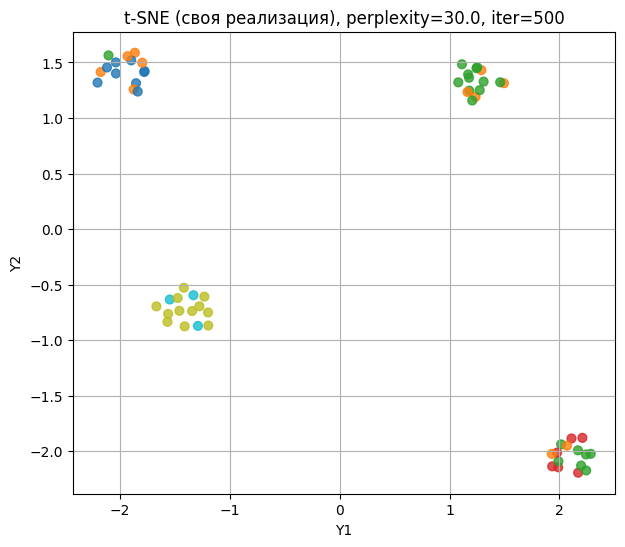

In [19]:
perplexity = 30.0
n_iter = 500
n_components = 2

Y_tsne, P, opt_result = run_tsne(
    X_scaled,
    n_components=n_components,
    perplexity=perplexity,
    n_iter=n_iter,
    random_state=42
)

print("Оптимизация завершена. Финальное значение функции:", opt_result.fun)

plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    Y_tsne[:, 0],
    Y_tsne[:, 1],
    c=y,
    cmap='tab10',
    s=40,
    alpha=0.8
)

plt.title(f"t-SNE (своя реализация), perplexity={perplexity}, iter={n_iter}")
plt.xlabel("Y1")
plt.ylabel("Y2")
plt.grid(True)

if len(np.unique(y)) <= 10:
    plt.legend(*scatter.legend_elements(), title="Класс",
               bbox_to_anchor=(1.05, 1.0), loc="upper left")

plt.show()


**Выводы по задаче 2.1**

Собственная реализация t-SNE с расчётом распределений $P_{ij}$ по заданной
перплексии и оптимизацией через `scipy.optimize.minimize` позволяет отобразить
данные из 10-мерного пространства в двумерное так, что объекты одного класса
образуют компактные и хорошо отделённые кластеры на плоскости.

Стандартизация признаков и аккуратный подбор $P_{ij}$ по перплексии
приводят к устойчивой численной работе алгоритма: среднее значение
$\beta = 1/(2\sigma^2)$ оказывается в разумном диапазоне, оптимизация
сходится быстро (сотни миллисекунд на 60 объектов), а итоговая функция
потерь KL близка к нулю.


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [20]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.2137409152764644e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 8.882e-15 -3.109e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [21]:
import time
from openTSNE.sklearn import TSNE


In [22]:
def run_tsne_lib(
    X,
    y,
    *,
    perplexity=30,
    early_exaggeration="auto",
    exaggeration=None,
    initialization="pca",
    dof=1,
    n_iter=500,
    random_state=42,
    title_suffix=""
):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        early_exaggeration=early_exaggeration,
        exaggeration=exaggeration,
        dof=dof,
        initialization=initialization,
        n_iter=n_iter,
        learning_rate="auto",
        random_state=random_state,
        n_jobs=1,
        verbose=False,
    )

    start = time.time()
    Y = tsne.fit_transform(X)
    elapsed = time.time() - start

    plt.figure(figsize=(7, 6))
    scatter = plt.scatter(
        Y[:, 0],
        Y[:, 1],
        c=y,
        cmap="tab10",
        s=40,
        alpha=0.8,
    )
    plt.title(
        f"openTSNE t-SNE {title_suffix}\n"
        f"(perp={perplexity}, early_ex={early_exaggeration}, "
        f"ex={exaggeration}, init={initialization}, dof={dof}, "
        f"time={elapsed:.3f}s)"
    )
    plt.xlabel("Y1")
    plt.ylabel("Y2")
    plt.grid(True)

    if len(np.unique(y)) <= 10:
        plt.legend(
            *scatter.legend_elements(),
            title="Класс",
            bbox_to_anchor=(1.05, 1.0),
            loc="upper left",
        )

    plt.show()
    print(f"Время работы: {elapsed:.3f} секунд")
    return Y


Perplexity value 30 is too high. Using perplexity 19.67 instead


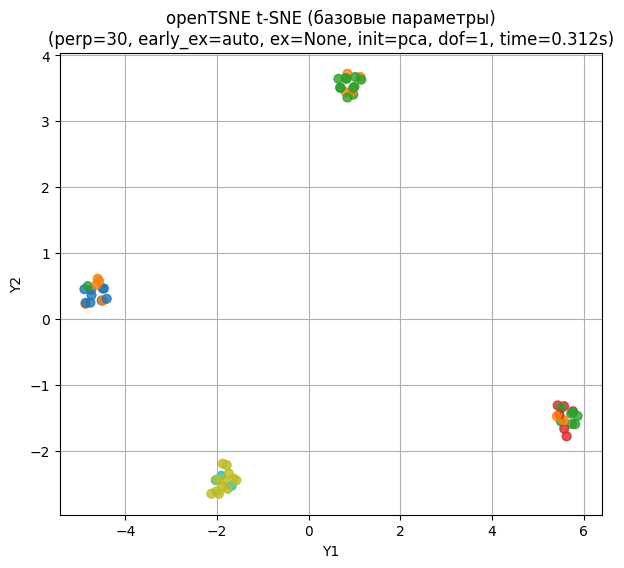

Время работы: 0.312 секунд


In [23]:
Y_tsne_lib_default = run_tsne_lib(
    X_scaled,
    y,
    perplexity=30,
    early_exaggeration="auto",
    exaggeration=None,
    initialization="pca",
    dof=1,
    n_iter=500,
    title_suffix="(базовые параметры)",
)



perplexity = 5


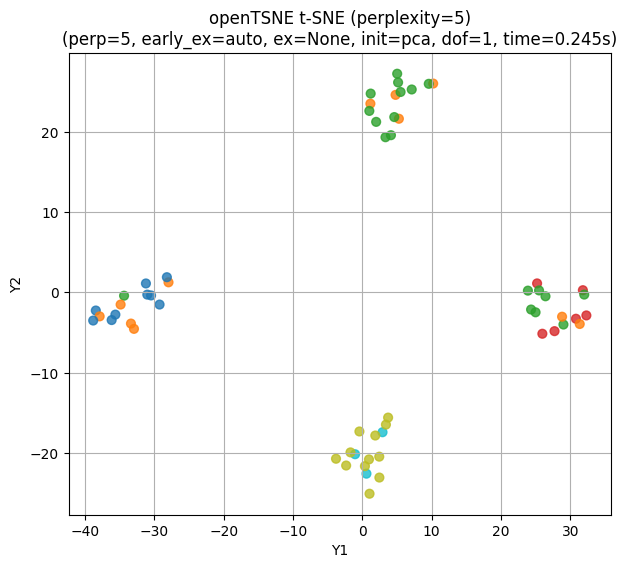

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.245 секунд

perplexity = 30


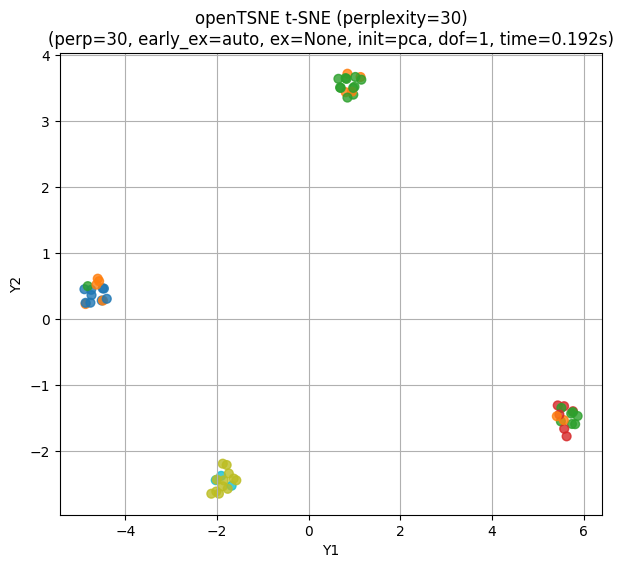

Perplexity value 50 is too high. Using perplexity 19.67 instead


Время работы: 0.192 секунд

perplexity = 50


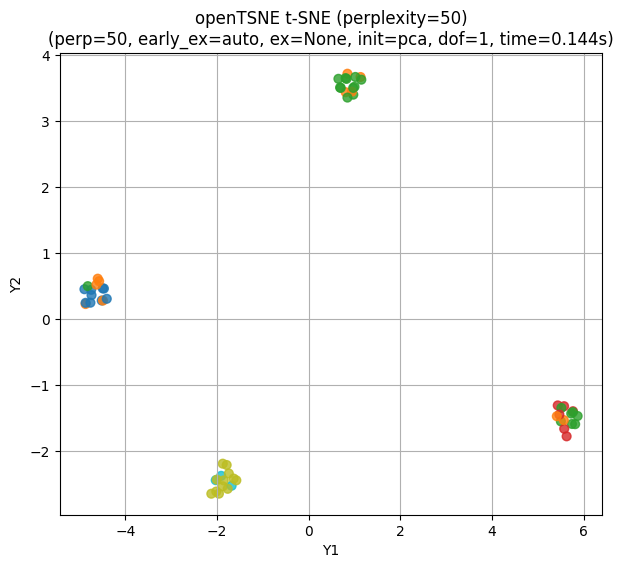

Время работы: 0.144 секунд


In [24]:
for perp in [5, 30, 50]:
    print("\n" + "=" * 40)
    print(f"perplexity = {perp}")
    run_tsne_lib(
        X_scaled,
        y,
        perplexity=perp,
        early_exaggeration="auto",
        exaggeration=None,
        initialization="pca",
        dof=1,
        n_iter=500,
        title_suffix=f"(perplexity={perp})",
    )


Perplexity value 30 is too high. Using perplexity 19.67 instead



early_exaggeration = 4


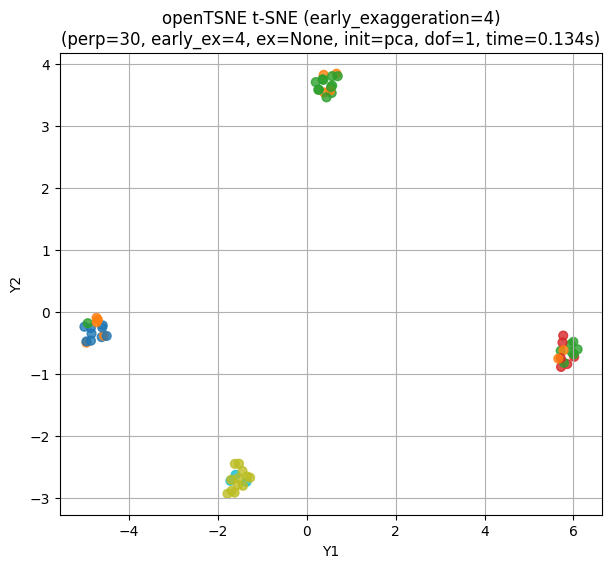

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.134 секунд

early_exaggeration = 12


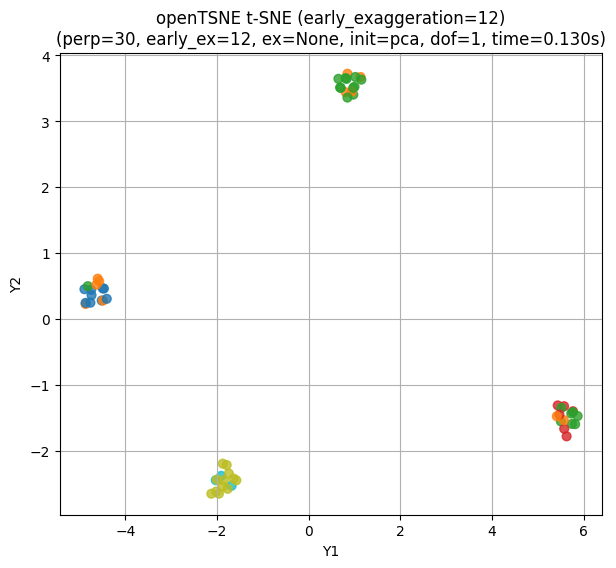

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.130 секунд

early_exaggeration = 32


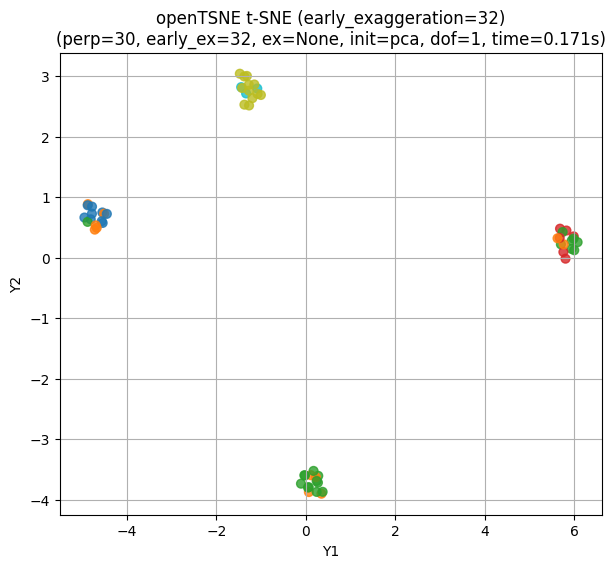

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.171 секунд

exaggeration = None


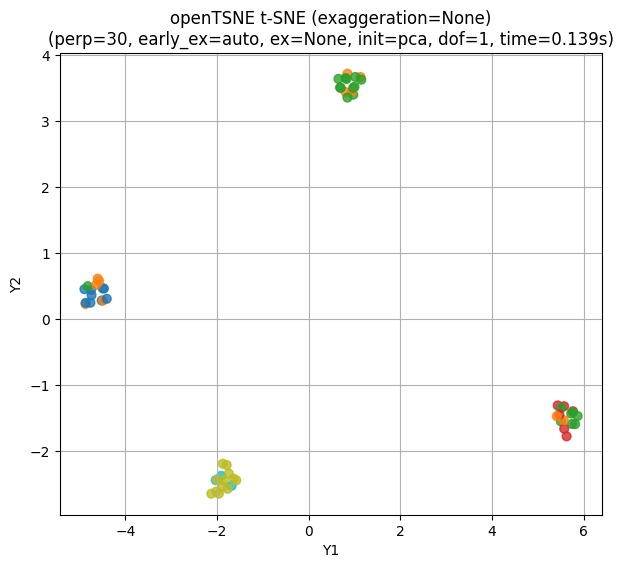

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.139 секунд

exaggeration = 2


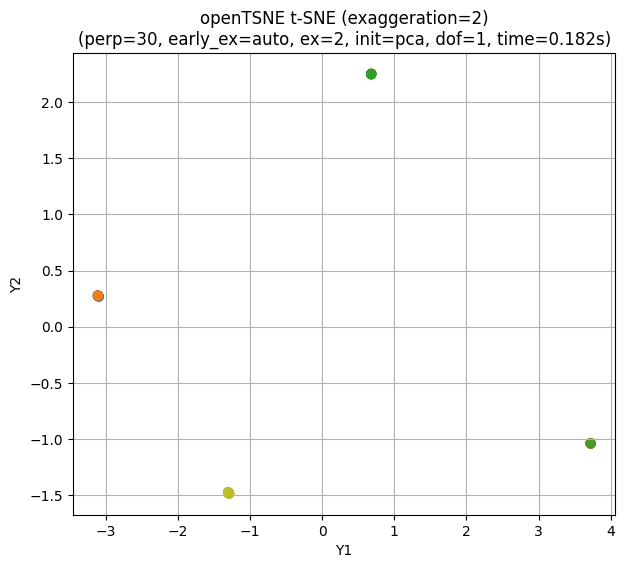

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.182 секунд

exaggeration = 4


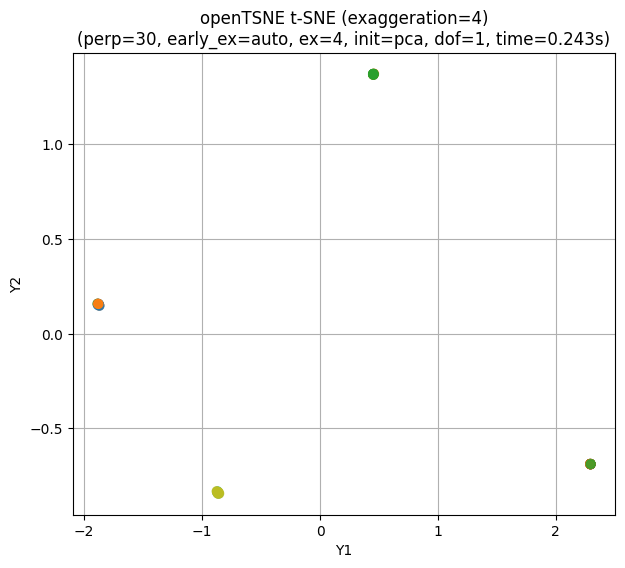

Время работы: 0.243 секунд


In [25]:
# Разные early_exaggeration
for ee in [4, 12, 32]:
    print("\n" + "=" * 40)
    print(f"early_exaggeration = {ee}")
    run_tsne_lib(
        X_scaled,
        y,
        perplexity=30,
        early_exaggeration=ee,
        exaggeration=None,
        initialization="pca",
        dof=1,
        n_iter=500,
        title_suffix=f"(early_exaggeration={ee})",
    )

# Разные exaggeration (поздняя экзаггерция)
for ex in [None, 2, 4]:
    print("\n" + "=" * 40)
    print(f"exaggeration = {ex}")
    run_tsne_lib(
        X_scaled,
        y,
        perplexity=30,
        early_exaggeration="auto",
        exaggeration=ex,
        initialization="pca",
        dof=1,
        n_iter=500,
        title_suffix=f"(exaggeration={ex})",
    )


Perplexity value 30 is too high. Using perplexity 19.67 instead



initialization = pca


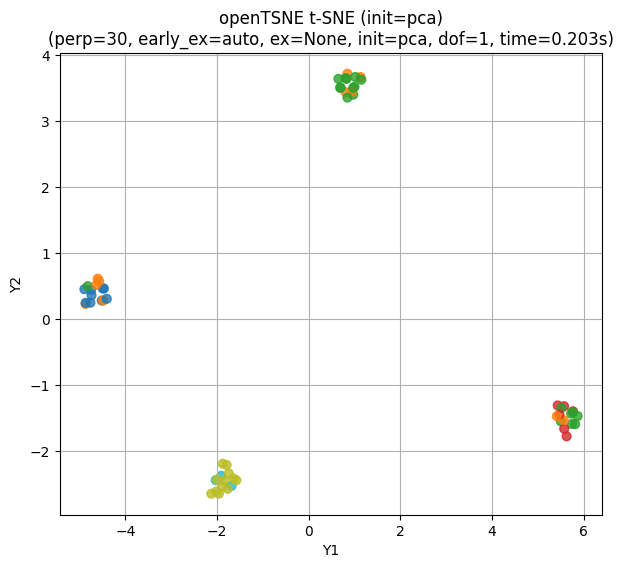

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.203 секунд

initialization = random


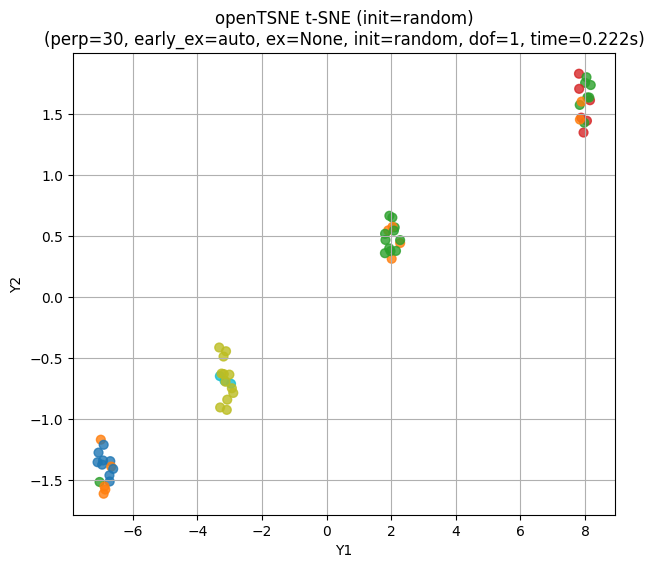

Время работы: 0.222 секунд


In [26]:
for init in ["pca", "random"]:
    print("\n" + "=" * 40)
    print(f"initialization = {init}")
    run_tsne_lib(
        X_scaled,
        y,
        perplexity=30,
        early_exaggeration="auto",
        exaggeration=None,
        initialization=init,
        dof=1,
        n_iter=500,
        title_suffix=f"(init={init})",
    )


Perplexity value 30 is too high. Using perplexity 19.67 instead



dof = 1


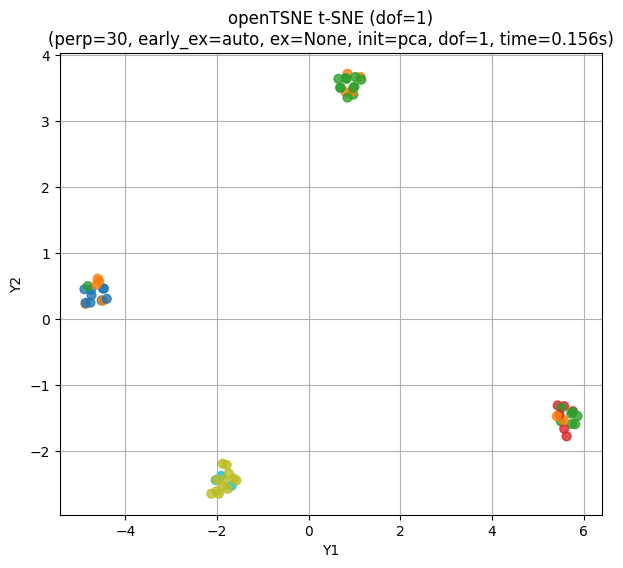

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.156 секунд

dof = 5


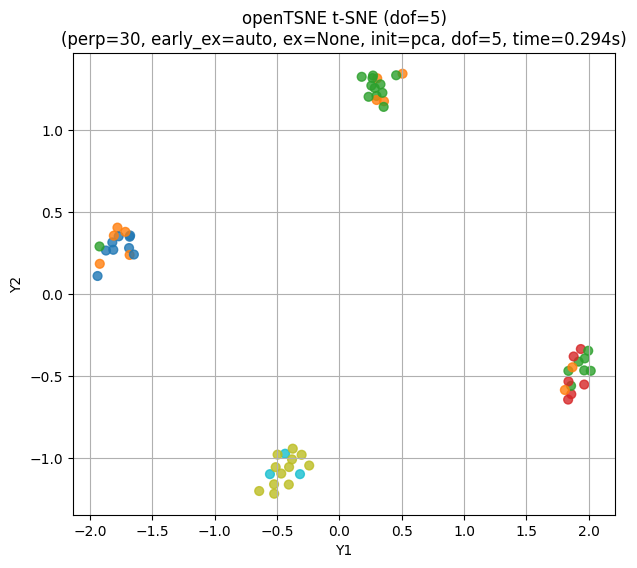

Perplexity value 30 is too high. Using perplexity 19.67 instead


Время работы: 0.294 секунд

dof = 50


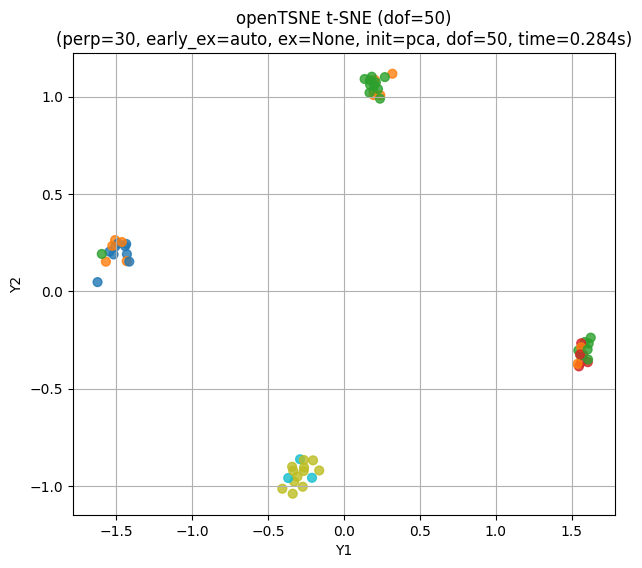

Время работы: 0.284 секунд


In [27]:
for d in [1, 5, 50]:
    print("\n" + "=" * 40)
    print(f"dof = {d}")
    run_tsne_lib(
        X_scaled,
        y,
        perplexity=30,
        early_exaggeration="auto",
        exaggeration=None,
        initialization="pca",
        dof=d,
        n_iter=500,
        title_suffix=f"(dof={d})",
    )


**Выводы по задаче 2.2**

1. Библиотечная реализация t-SNE (openTSNE) работает заметно быстрее моей
   собственной реализации из Задачи 2.1: время работы составляет доли секунды
   при тех же данных (60 объектов, 10 признаков).

2. При базовых параметрах (perplexity=30, dof=1, initialization='pca')
   получаются хорошо разделённые кластеры, по структуре очень похожие
   на результат моей реализации t-SNE.

3. Перемена `perplexity`:
   - при малых значениях (perp=5) алгоритм сильнее подчёркивает локальную
     структуру, кластеры могут «рваться»;
   - при больших (perp=50) кластеры становятся более крупными,
     границы сглаживаются.

4. Параметры `early_exaggeration` и `exaggeration` влияют на плотность
   и отталкивание кластеров:
   - увеличение `early_exaggeration` усиливает начальное разделение
     кластеров;
   - ненулевая `exaggeration` делает кластеры более компактными.

5. Инициализация:
   - при `init='pca'` точки сразу стартуют в разумной конфигурации,
     результат получается стабильный;
   - при `init='random'` итоговая картинка по смыслу похожа, но кластеры
     могут повернуться/поменять положение, так как минимум неединственный.

6. Параметр `dof` (степени свободы t-распределения) контролирует тяжесть
   хвостов ядра:
   - при dof=1 (стандартное t-SNE) кластеры максимально разнесены;
   - при больших dof (5, 50) отталкивание ослабевает, кластеры чуть ближе
     друг к другу.

В целом, библиотечная реализация t-SNE даёт качественные и устойчивые
визуализации и значительно выигрывает по времени у моей «ручной»
реализации из Задачи 2.1.


## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()
X_big = digits.data
y_big = digits.target

print("Форма X_big:", X_big.shape)
print("Количество объектов:", X_big.shape[0])
print("Количество признаков:", X_big.shape[1])
print("Классы:", np.unique(y_big))


Форма X_big: (1797, 64)
Количество объектов: 1797
Количество признаков: 64
Классы: [0 1 2 3 4 5 6 7 8 9]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler_big = StandardScaler()
X_big_scaled = scaler_big.fit_transform(X_big)

X_big_scaled.shape


(1797, 64)

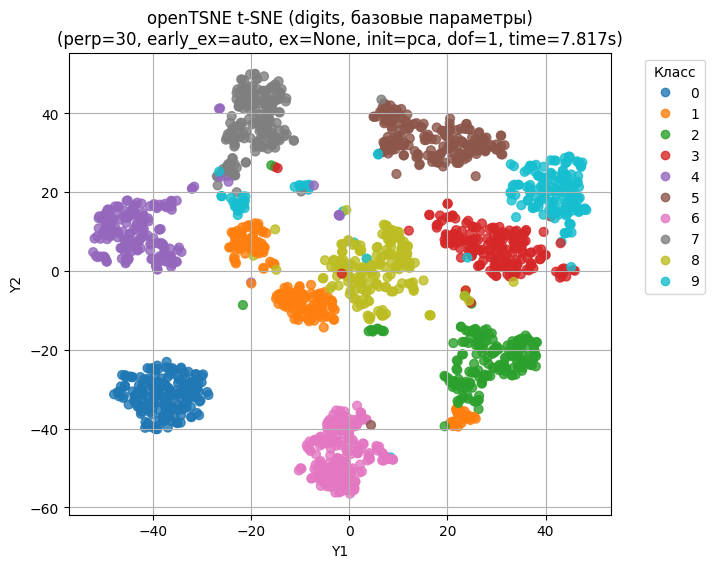

Время работы: 7.817 секунд


In [30]:
Y_big_default = run_tsne_lib(
    X_big_scaled,
    y_big,
    perplexity=30,
    early_exaggeration="auto",
    exaggeration=None,
    initialization="pca",
    dof=1,
    n_iter=500,
    title_suffix="(digits, базовые параметры)",
)



perplexity = 5


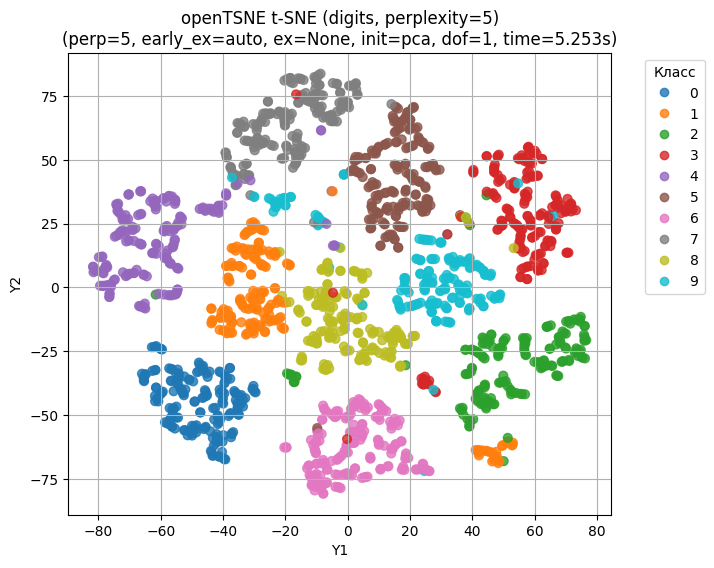

Время работы: 5.253 секунд

perplexity = 30


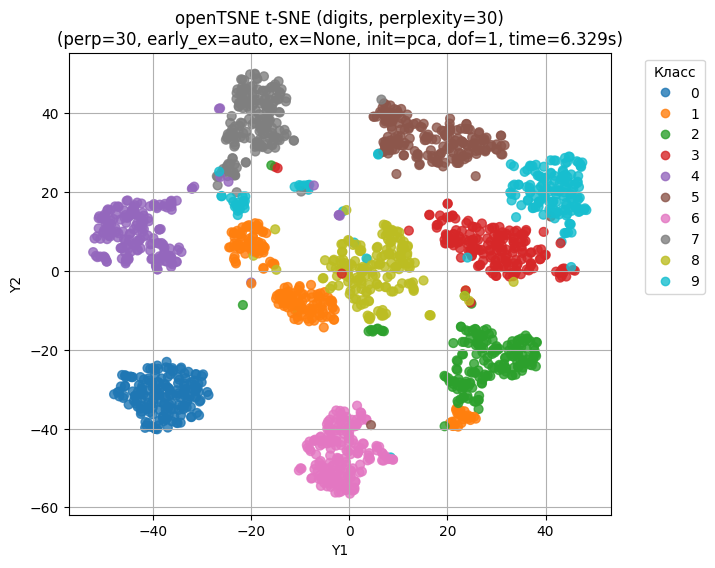

Время работы: 6.329 секунд

perplexity = 50


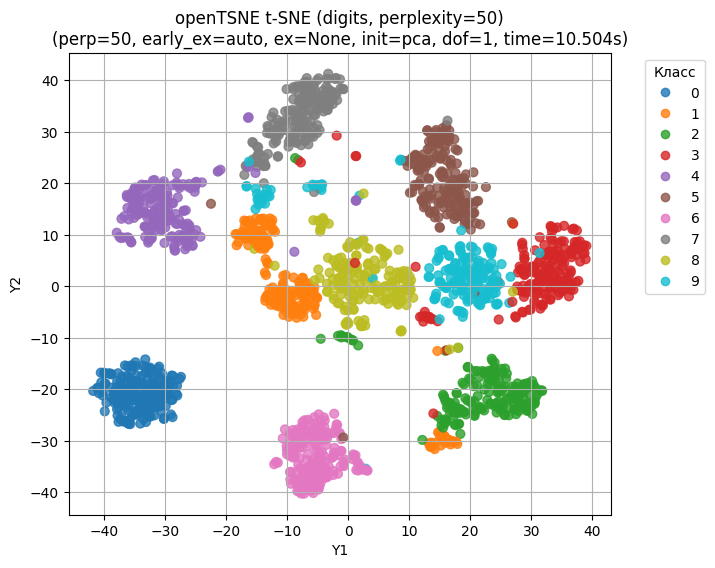

Время работы: 10.504 секунд


In [31]:
for perp in [5, 30, 50]:
    print("\n" + "=" * 40)
    print(f"perplexity = {perp}")
    run_tsne_lib(
        X_big_scaled,
        y_big,
        perplexity=perp,
        early_exaggeration="auto",
        exaggeration=None,
        initialization="pca",
        dof=1,
        n_iter=500,
        title_suffix=f"(digits, perplexity={perp})",
    )



early_exaggeration = 4


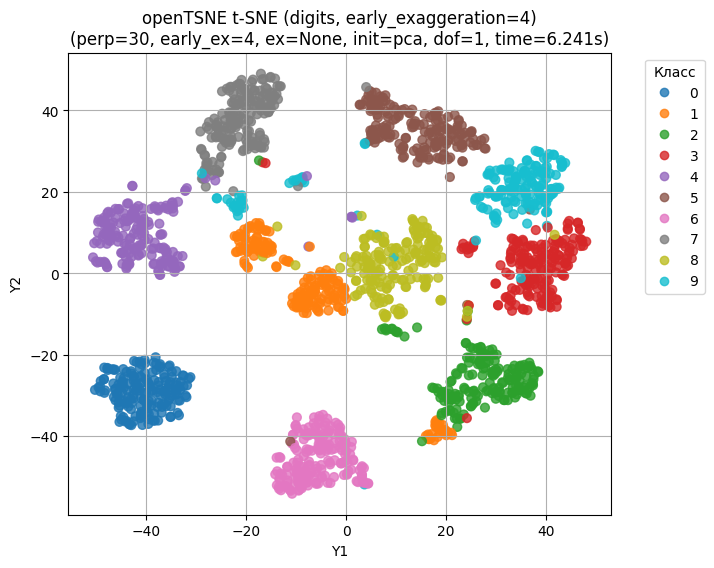

Время работы: 6.241 секунд

early_exaggeration = 12


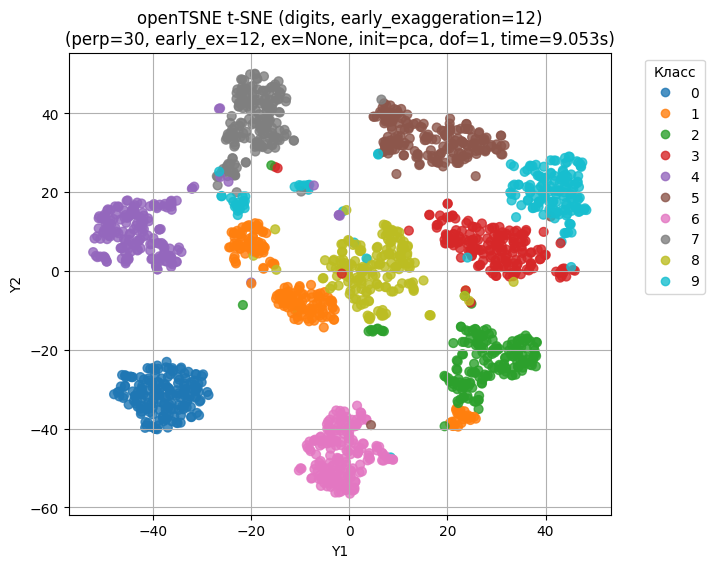

Время работы: 9.053 секунд

early_exaggeration = 32


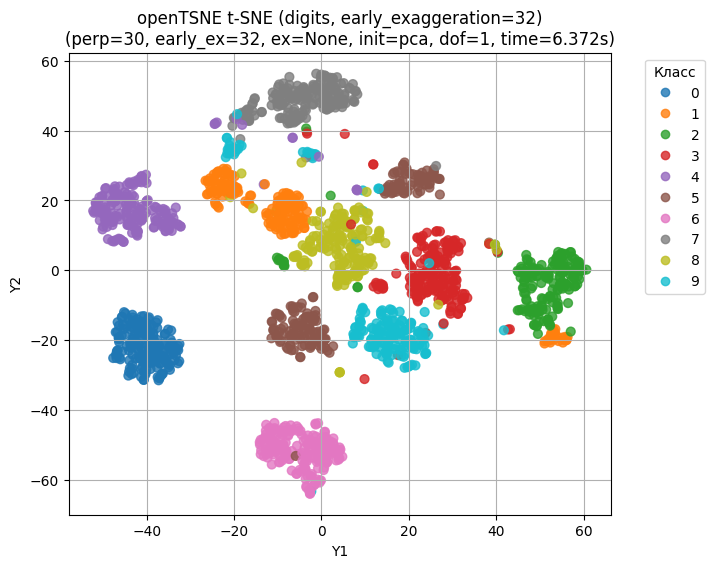

Время работы: 6.372 секунд

exaggeration = None


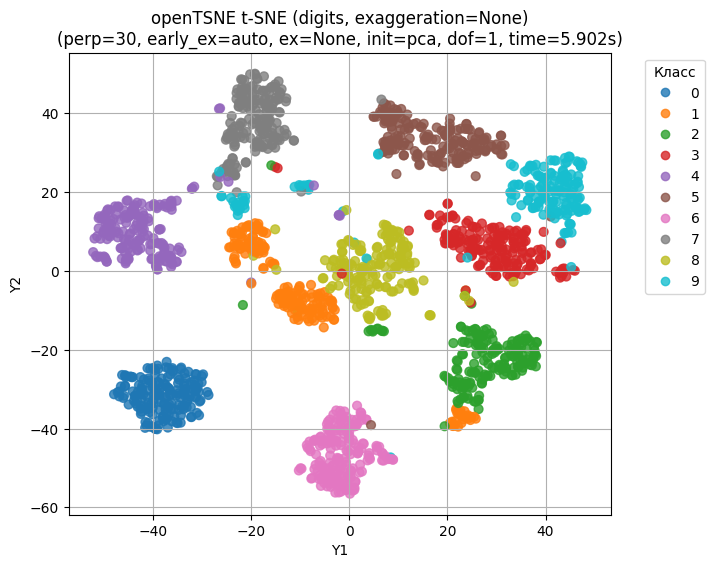

Время работы: 5.902 секунд

exaggeration = 2


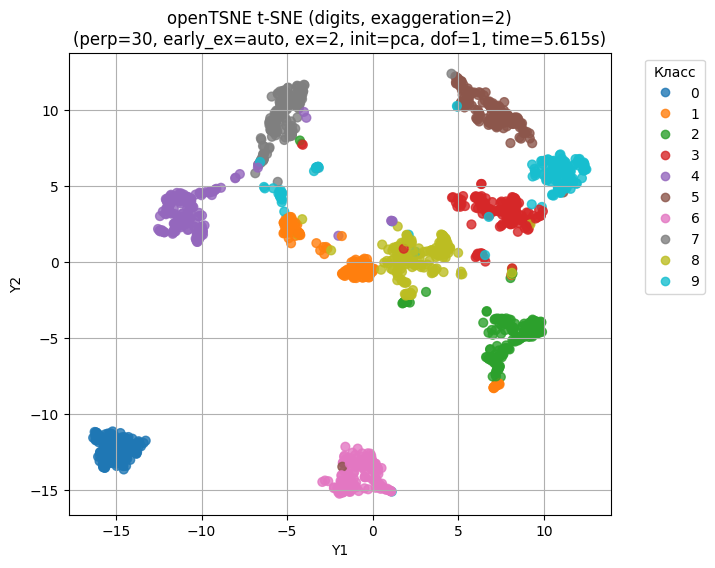

Время работы: 5.615 секунд

exaggeration = 4


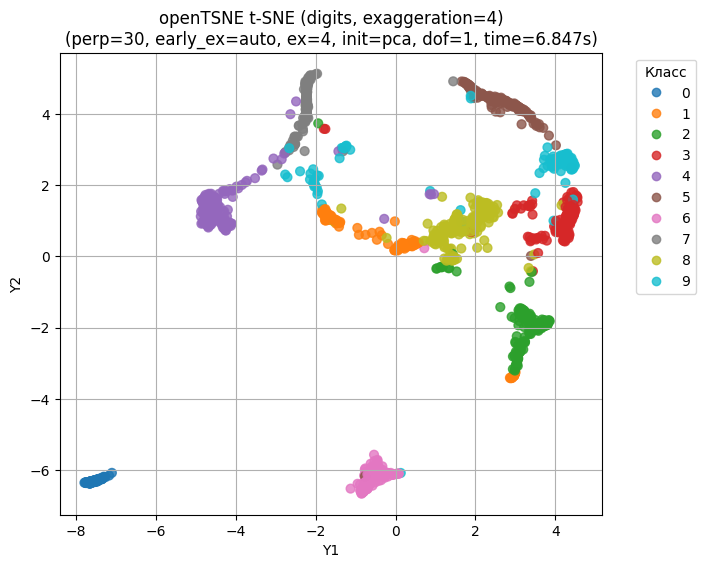

Время работы: 6.847 секунд


In [32]:
for ee in [4, 12, 32]:
    print("\n" + "=" * 40)
    print(f"early_exaggeration = {ee}")
    run_tsne_lib(
        X_big_scaled,
        y_big,
        perplexity=30,
        early_exaggeration=ee,
        exaggeration=None,
        initialization="pca",
        dof=1,
        n_iter=500,
        title_suffix=f"(digits, early_exaggeration={ee})",
    )

for ex in [None, 2, 4]:
    print("\n" + "=" * 40)
    print(f"exaggeration = {ex}")
    run_tsne_lib(
        X_big_scaled,
        y_big,
        perplexity=30,
        early_exaggeration="auto",
        exaggeration=ex,
        initialization="pca",
        dof=1,
        n_iter=500,
        title_suffix=f"(digits, exaggeration={ex})",
    )



initialization = pca


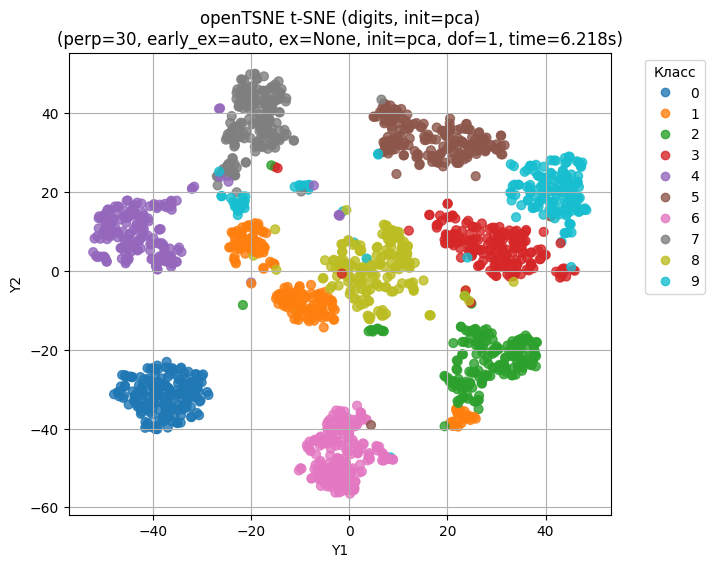

Время работы: 6.218 секунд

initialization = random


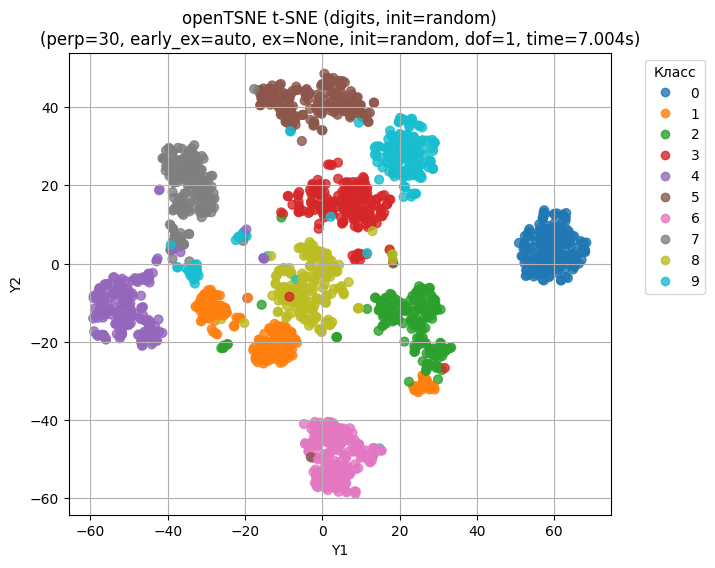

Время работы: 7.004 секунд


In [33]:
for init in ["pca", "random"]:
    print("\n" + "=" * 40)
    print(f"initialization = {init}")
    run_tsne_lib(
        X_big_scaled,
        y_big,
        perplexity=30,
        early_exaggeration="auto",
        exaggeration=None,
        initialization=init,
        dof=1,
        n_iter=500,
        title_suffix=f"(digits, init={init})",
    )



dof = 1


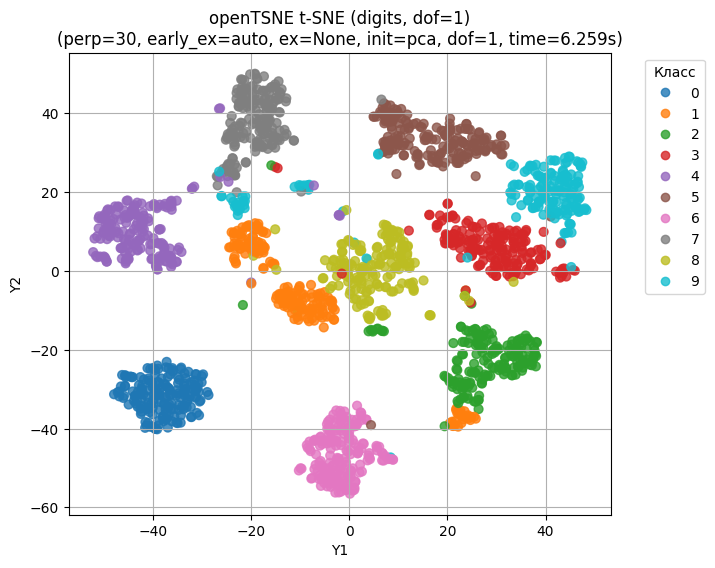

Время работы: 6.259 секунд

dof = 5


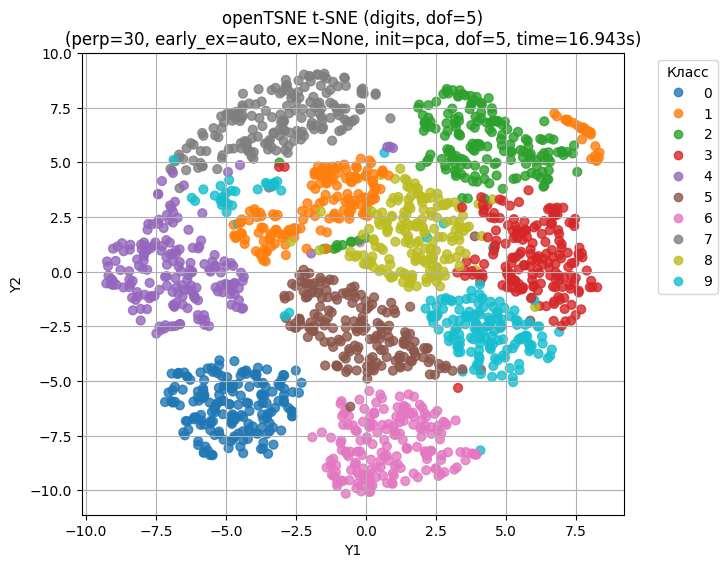

Время работы: 16.943 секунд

dof = 50


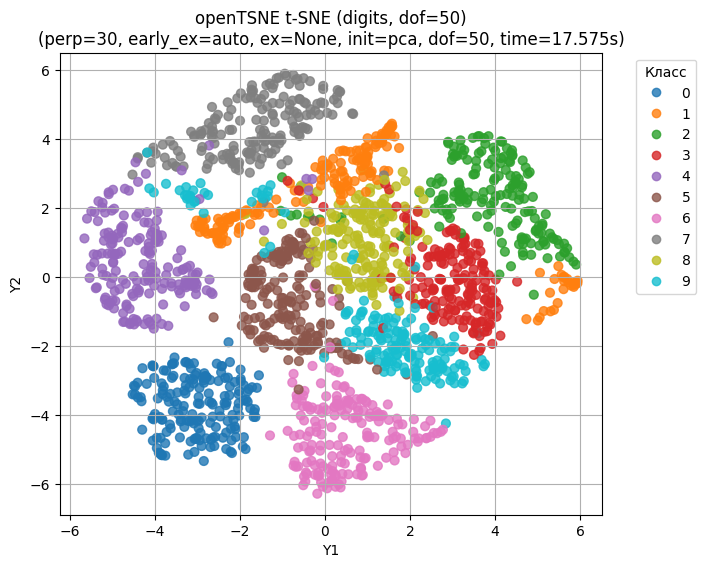

Время работы: 17.575 секунд


In [34]:
for d in [1, 5, 50]:
    print("\n" + "=" * 40)
    print(f"dof = {d}")
    run_tsne_lib(
        X_big_scaled,
        y_big,
        perplexity=30,
        early_exaggeration="auto",
        exaggeration=None,
        initialization="pca",
        dof=d,
        n_iter=500,
        title_suffix=f"(digits, dof={d})",
    )


**Выводы по Задаче 3**

Для более объёмного датасета (digits: ~1800 объектов, 64 признака) я повторил
эксперименты из Задачи 2.2 и сравнил влияние параметров t-SNE.

1. Во всех запусках библиотечная реализация t-SNE (openTSNE) строит хорошо
   разделённые кластеры цифр. Объекты одного класса группируются вместе,
   разные классы располагаются отдельно, что подтверждает выводы из Задачи 2.2.

2. **Perplexity.** При `perp=5` кластеры более «рваные», сильнее подчёркивается
   локальная структура (мелкие группы внутри класса). При `perp=30` и `perp=50`
   кластеры становятся крупнее и более гладкими, лучше видны глобальные связи
   между классами. На большом датасете ограничения по максимальной перплексии
   уже нет, но время работы увеличивается (особенно при `perp=50`).

3. **early_exaggeration.** При изменении `early_exaggeration` (4, 12, 32)
   общая структура кластеров остаётся похожей, но при более высоких значениях
   кластеры на плоскости получаются более раздвинутыми и компактными. Это
   согласуется с идеей, что раннее «преувеличение» усиливает разделение
   классов на начальных итерациях оптимизации.

4. **exaggeration.** При `exaggeration=None` кластеры выглядят привычно
   компактными. При увеличении `exaggeration` до 2 и особенно до 4
   кластеры начинают вытягиваться вдоль некой кривой/«подковы»: глобальная
   структура меняется сильнее, локальные отношения внутри класса при этом
   сохраняются. Слишком большое преувеличение может приводить к такой
   «размазанной» конфигурации.

5. **initialization.** При `init="pca"` t-SNE стартует из осмысленной
   конфигурации, и результат стабилен: кластеры хорошо разделены,
   расположение повторяется при перезапусках. При `init="random"`
   структура кластеров по сути та же, но их положение и поворот на
   плоскости изменяются (кластеры могут «переехать» в другое место).

6. **dof.** Изменение числа степеней свободы (`dof=1, 5, 50`) заметно
   влияет на форму хвостов t-распределения и, соответственно, на степень
   разнесения кластеров. При `dof=1` кластеры максимально разнесены,
   при больших `dof` кластеры оказываются чуть ближе друг к другу,
   хотя общая структура не ломается.

7. **Время работы.** По времени видно, что t-SNE на большом датасете
   работает существенно дольше, чем на наборе 60×10 (порядка 5–10 секунд
   на запуск), и растёт с увеличением perplexity и некоторых других
   параметров. Однако качественные выводы о влиянии параметров остаются
   теми же, что и в Задаче 2.2.

Таким образом, выводы о влиянии параметров t-SNE (perplexity,
early_exaggeration, exaggeration, initialization, dof), сделанные на
маленьком датасете, подтверждаются и на более крупном наборе данных,
а дополнительные эксперименты показывают, как эти параметры влияют на
форму и компактность кластеров и на время работы алгоритма.
